In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

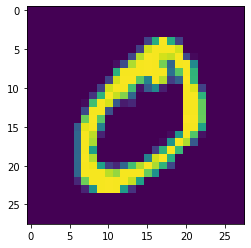

In [ ]:
plt.imshow(x_train[1])

In [ ]:
x_train = x_train.reshape(60000,28*28)
x_train = x_train/255
x_train = np.concatenate((np.zeros(len(y_train)).reshape(len(y_train),1), x_train), axis=1)
x_train.shape

(60000, 785)

In [ ]:
y_train_0 = np.zeros(y_train.shape[0], dtype=int)
y_train_0

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

In [ ]:
#  We will make one column for each of the classes with the same length as y.
#  When the class is 5, make a column that has 1 for the rows with 5 and 0 otherwise.


y_train_new = np.where(y_train==0, 1, 0)
y_train_1 = np.where(y_train==1, 1, 0)
y_train_2 = np.where(y_train==2, 1, 0)
y_train_3 = np.where(y_train==3, 1, 0)
y_train_4 = np.where(y_train==4, 1, 0)
y_train_5 = np.where(y_train==5, 1, 0)
y_train_6 = np.where(y_train==6, 1, 0)
y_train_7 = np.where(y_train==7, 1, 0)
y_train_8 = np.where(y_train==8, 1, 0)
y_train_9 = np.where(y_train==9, 1, 0)

np.unique(y_train_9, return_counts=True)

(array([0, 1]), array([54051,  5949]))

In [ ]:
y_all = np.concatenate((y_train_new.reshape(60000,1), y_train_1.reshape(60000,1), y_train_2.reshape(60000,1), y_train_3.reshape(60000,1), y_train_4.reshape(60000,1), y_train_5.reshape(60000,1), y_train_6.reshape(60000,1), y_train_7.reshape(60000,1), y_train_8.reshape(60000,1), y_train_9.reshape(60000,1)), axis=1)
y_all.shape

(60000, 10)

In [ ]:
np.unique(y_train_new)

array([0, 1])

In [ ]:
def sigmoid(z):
  return 1/(1 + np.exp(-z))

In [ ]:
def costFunction(x_tn, y, theta):
  
  z =  np.dot(x_tn, theta)
  
  h_theta = sigmoid(z)
  predict_1=np.zeros(len(y))
  predict_0=np.zeros(len(y))
  predict_1 = y * np.log(h_theta)
  predict_0 = (1-y) * np.log(1 - h_theta)

  J = (-1/x_tn.shape[0]) * np.sum(predict_1 + predict_0)
  return J

In [ ]:
# Fitting the logistic regression model

def fit(x_ty, y, learning_rate, epochs):
  
  theta = np.zeros(x_ty.shape[1])   # 5X1
  N = len(y)
  loss=[]
  for _ in range(epochs):
    z =  np.dot(x_ty, theta)   #1X5 5X1
    h_theta = sigmoid(z)
    theta = theta - ((learning_rate/N) * np.dot(x_ty.T, (h_theta - y)))
    loss.append(costFunction(x_ty, y, theta))
    
  return loss,theta

In [ ]:
# Prediction for single class

def predict(x_tp, theta):
  h_theta = sigmoid(np.dot(x_tp, theta))
  return [1 if i>0.5 else 0 for i in h_theta]

In [ ]:
# Calling fit() function for multiple classes

def multiple_class(x_ty, y1, learning_rate, epochs):
  complete_loss = []
  complete_theta = np.zeros((10,785))
  for i in range(10):
    y = y1[:,i]
    loss,weights = fit(x_ty, y, learning_rate, epochs)
    complete_loss.append(loss)
    complete_theta[i] = weights

  return complete_loss, complete_theta

In [ ]:
# Prediction for multiple classes

def predict_for_all(x_tp, theta):
  h_theta=[]
  for i in range(10):
    h_theta1 = sigmoid(np.dot(x_tp, theta[i]))
    h_theta = np.append(h_theta,h_theta1)
  return h_theta

In [ ]:
# Training for single class

loss, weights = fit(x_train, y_train_new, learning_rate=0.1, epochs=20)

In [ ]:
# Training for multiple class

loss, weights = multiple_class(x_train, y_all, learning_rate=0.1, epochs=4000)

Predicted value is : 8


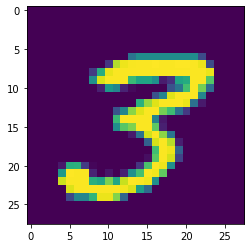

In [ ]:
# Checking from training set with multiple class

num_to_predict = 203
predicted_value = predict_for_all(x_train[num_to_predict], weights)
print(f'Predicted value is : {np.argmax(predicted_value)}')
plt.imshow((x_train[num_to_predict][1:]).reshape(28,28))

Predicted value is : 9


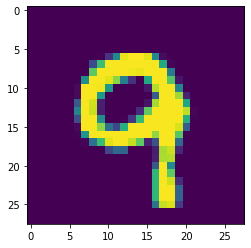

In [ ]:
# Checking from test set with multiple class

num_index = 99
x_test_ind = x_test[num_index]/255
x_flatten = (x_test_ind).reshape(784,)
fl = np.concatenate(((np.zeros(1)).reshape(1,), x_flatten), axis=0)
predicted_values = predict_for_all((fl), weights)
print(f'Predicted value is : {np.argmax(predicted_values)}')
plt.imshow(x_test[num_index])